## Advanced python - Object Oriented Programming

### 1. OOP vs Functions
- a class is a 'type', which inclues functions and variables.
- create an object (instance) from the class.
- OOP is a way orgnize things into objects and relationships between objects.
- Functions are like pipelines, with inputs and outputs.

### 2. mini project 
- portforlio management


In [13]:
import pandas as pd
from pathlib import Path
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import time

class Exchange:
    def __init__(self):
        self.stocks = ['AAPL', 'DPZ', 'GOOG', 'IBM', 'ISRG', 'MNST', 'TSCO', 'TSLA', 'V']
        self.stock_data = pd.DataFrame()
        self.current_date = None
        self.load_stock_data() # to be written
        self.set_initial_date() # to be wirtten
        
    def load_stock_data(self):
        dfs = []
        for stock in self.stocks:
            file_path = Path('./Resources/' + stock + '.csv')
            df = pd.read_csv(file_path, index_col='Date')
            df.rename(columns={stock: stock}, inplace=True)
            dfs.append(df)
        self.stock_data = pd.concat(dfs, axis=1, join='inner')        
    def set_initial_date(self):
        self.current_date = self.stock_data.index[0]
    
    def get_price(self, stock):
        return self.stock_data.at[self.current_date, stock]
    def time_passing(self, tick = 1):
        all_dates = self.stock_data.index
        current_idx = all_dates.get_loc(self.current_date)
        if current_idx + tick < len(all_dates):
            self.current_date = all_dates[current_idx + tick]
        else:
            print("Reached the end of the available data.")
            



# temp_var = Exchange()
        
# temp_var.time_passing(tick = 100)

# print(temp_var.get_price('IBM'))


In [14]:
class Stock:
    def __init__(self, symbol, num_shares, purchase_price):
        self.symbol = symbol
        self.num_shares = num_shares
        self.purchase_price = purchase_price
    
    def get_current_price(self, exchange):
        return exchange.get_price(self.symbol)
    
    def get_value(self, exchange):
        current_price = self.get_current_price(exchange)
        return current_price * self.num_shares if current_price is not None else 0
        
    

In [21]:
class Portfolio:
    def __init__(self, initial_investment, allocations, exchange):
        self.initial_investment = initial_investment
        self.exchange = exchange
        self.stocks = {}
        self.set_allocation(allocations) # to be written
    def set_allocation(self, allocations):
        total_investment = self.initial_investment
        for symbol, weight in allocations:
            purchase_price = self.exchange.get_price(symbol)
            if purchase_price is not None:
                num_shares = (total_investment * weight) / purchase_price
                self.stocks[symbol] = Stock(symbol, num_shares, purchase_price)
                
    def get_total_value(self):
        return sum(stock.get_value(self.exchange) for stock in self.stocks.values())
    
    def plot_portfolio_value_and_happiness(self):
        happiness = 0
        last_total_value = self.get_total_value()
        portfolio_values = []
        happiness_values = []
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
        plt.ion()
        try:
            while True:
                # Update Portfolio Value
                self.exchange.time_passing(tick = 1)  # Move to the tick
                current_total_value = self.get_total_value()
                portfolio_values.append(current_total_value)

                # Update Happiness
                if current_total_value < last_total_value:
                    happiness -= 1
                elif current_total_value > last_total_value:
                    happiness += 0.5
                happiness_values.append(happiness)
                last_total_value = current_total_value
                   
                # Update the first subplot - Portfolio Value
                ax1.clear()
                ax1.plot(portfolio_values,'-o')
                ax1.set_title('Portfolio Value Over Time')
                ax1.set_xlabel('Time (days)')
                ax1.set_ylabel('Portfolio Value')

                # Update the second subplot - Happiness
                ax2.clear()
                ax2.plot(happiness_values,'-o', color='orange')
                ax2.set_title('Accumulated Happiness Over Time')
                ax2.set_xlabel('Time (days)')
                ax2.set_ylabel('Happiness')
                clear_output(wait=True)
                display(fig)
                plt.pause(.01)  # Pause for  the plot to update
        except KeyboardInterrupt:
            plt.ioff()
            plt.show()
        

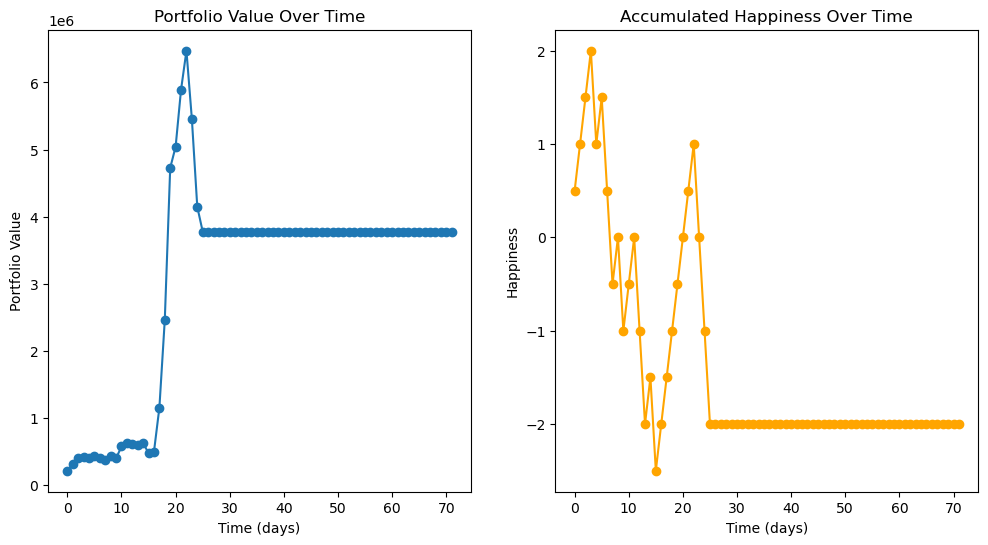

Reached the end of the available data.


In [22]:
# test the portfolio
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

exchange = Exchange()  # Assuming Exchange class is already implemented
allocations = [('AAPL', 0.2), ('GOOG', 0.3), ('IBM', 0.5)]  # Sample allocations
portfolio = Portfolio(100000, allocations, exchange)
portfolio.plot_portfolio_value_and_happiness()

# Guidelines for Tech Interview

### 1. Buy Low Sell High

Xena is an amateur day trader who is trading IAG, a mineral exploration company. On December 12, 2015 at 10 a.m., Xena determined that IAG was a buying opportunity and bought 10,000 shares at 1.42 per share; she ended up selling it an hour later (11 a.m.) at 1.85 per share, generating a profit of $4,300. Although a fantastic trade in and of itself, Xena wants to know if she could have possibly made more money.

These were all the prices of IAG at 5-minute intervals on December 12, 2015, between the hours of 10 a.m. and 11 a.m.:

`$1.42, $1.32, $1.45, $1.20, $1.34, $1.74, $1.10, $1.89, $1.42, $1.90, $1.80, $1.85`

Write an efficient function that takes a list of stock prices in chronological order and finds the best trade by calculating the maximum profit through the determination of the minimum (buy) and maximum (sell) stock prices.

### 2. Counting Letters

### 3. Deep Equals